# Reachability Analysis for Split Computing Neural Networks

## 1. Import Packages

In [1]:
begin
	import Pkg
	Pkg.activate("..")
	Pkg.instantiate()
	
    push!(LOAD_PATH, "$(@__DIR__)/../src")
    
    using NoisyReach
    using Random

    Random.seed!(123) # Setting the seed
end

  Activating project at `~/Downloads/sc/NoisyReach.jl`


TaskLocalRNG()

## 2. Physical System and Neural Networks Uncertainty Setup

In [2]:
sys = benchmarks[:F1]
const h   = 0.02
const Dc = 0.005
const σ  = 0.3
const μ   = 0.
const H   = 10
const N = 10000

10000

In [3]:
sys_ideal, K_ideal = synthesize(sys, h)
x₀ = fill(1., size(sys.A, 1))

2-element Vector{Float64}:
 1.0
 1.0

In [4]:
sys_aug, K_aug = synthesize(sys, h, Dc)
z₀ = [fill(1., size(sys.A, 1)); 0.]

3-element Vector{Float64}:
 1.0
 1.0
 0.0

## 3. Calculate and Plot Reachable Trajectories

In [5]:
traj_z, traj_u = unzip([simulate(sys_aug, K_uncertain(K_aug, σ, μ), H, z₀) for _ in 1:N])
traj_ideal_x, traj_ideal_u = simulate(sys_ideal, K_ideal, H, x₀)

([[1.0, 1.0], [1.176930670517217, 1.722010315649492], [1.470768208602789, 2.798567193359311], [1.9395173129574657, 4.412957489020335], [2.671120514514951, 6.842476381094825], [3.7988170911162045, 10.506701720462924], [5.524388672267808, 16.040553374177122], [8.153340737022116, 24.40486300665838], [12.148148202343824, 37.053713382906345], [18.20883971455207, 56.18769449722048], [27.394957140176754, 85.13718897392849]], [[1.8339062017497092], [2.7344544693829396], [4.100551350979], [6.170977985869204], [9.307132361994972], [14.055983200434067], [21.245346466502397], [32.12807995566983], [48.600312030357905], [73.53171597083835]])

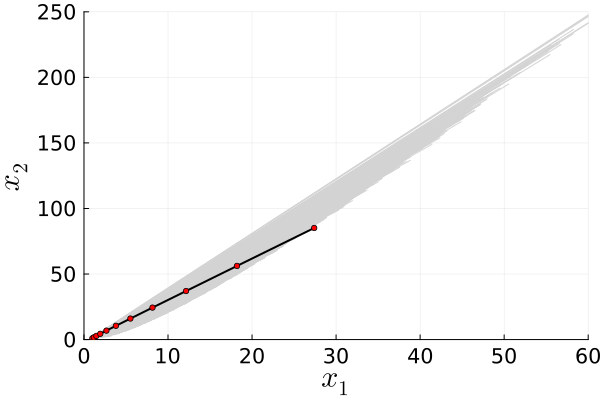

In [6]:
plot_trajectories(traj_z, traj_ideal_x, 60, 250, fname="NNe.svg")

In [7]:
maximum(tr_z -> maximum(z -> z[1], tr_z), traj_z)

68.29585925798028

In [8]:
maximum(tr_z -> maximum(z -> z[2], tr_z), traj_z)

281.50004154869777

In [9]:
maximum(tr_u -> maximum(u -> abs(u[1]), tr_u), traj_u)

332.8298567966806

In [10]:
maximum(tr_u -> tr_u[1], traj_ideal_u)

73.53171597083835